In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
from math import pi

In [3]:
deliveries = pd.read_csv("C:/Users/nikhi/Downloads/deliveries.csv")
match = pd.read_csv("C:/Users/nikhi/Downloads/matches.csv")

In [4]:
print(deliveries.describe(include='all'))

             match_id         inning    batting_team    bowling_team  \
count   150460.000000  150460.000000          150460          150460   
unique            NaN            NaN              14              14   
top               NaN            NaN  Mumbai Indians  Mumbai Indians   
freq              NaN            NaN           18943           18879   
mean       318.281317       1.482188             NaN             NaN   
std        182.955531       0.501768             NaN             NaN   
min          1.000000       1.000000             NaN             NaN   
25%        161.000000       1.000000             NaN             NaN   
50%        319.000000       1.000000             NaN             NaN   
75%        476.000000       2.000000             NaN             NaN   
max        636.000000       4.000000             NaN             NaN   

                 over           ball  batsman non_striker           bowler  \
count   150460.000000  150460.000000   150460      150460

In [5]:
batting_team_runs = deliveries.groupby("batting_team")["total_runs"].sum().reset_index()
batting_team_runs = batting_team_runs[batting_team_runs["total_runs"] > 10000]
batting_team_runs = batting_team_runs.sort_values(by="total_runs", ascending=False)

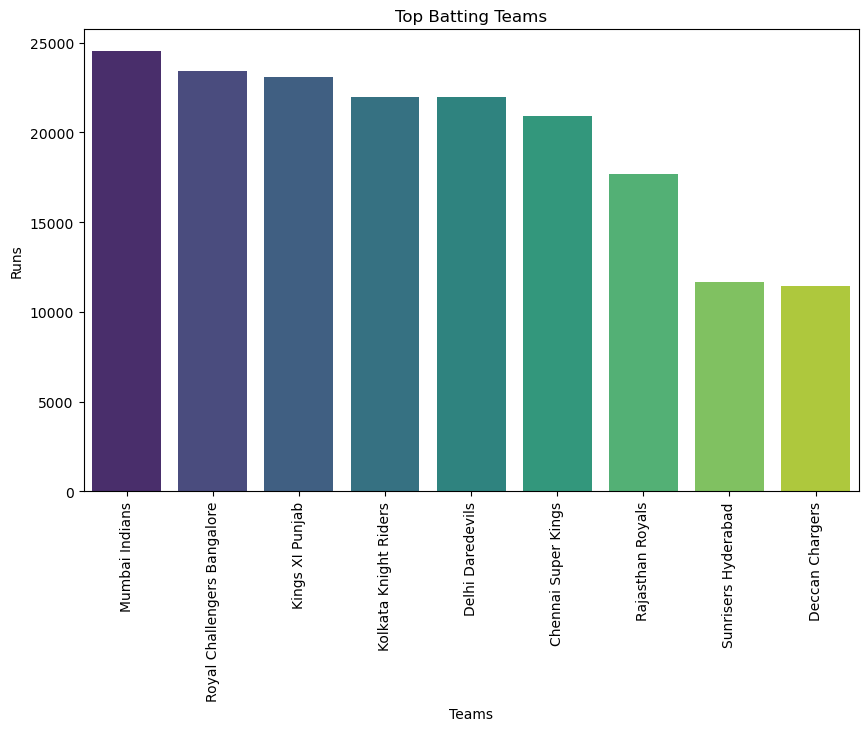

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x=batting_team_runs["batting_team"], y=batting_team_runs["total_runs"], palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Runs")
plt.title("Top Batting Teams")
plt.show()


In [7]:
bowling_team_extras = deliveries.groupby("bowling_team")["extra_runs"].sum().reset_index()
bowling_team_extras = bowling_team_extras[bowling_team_extras["extra_runs"] > 1000]
bowling_team_extras = bowling_team_extras.sort_values(by="extra_runs", ascending=False)


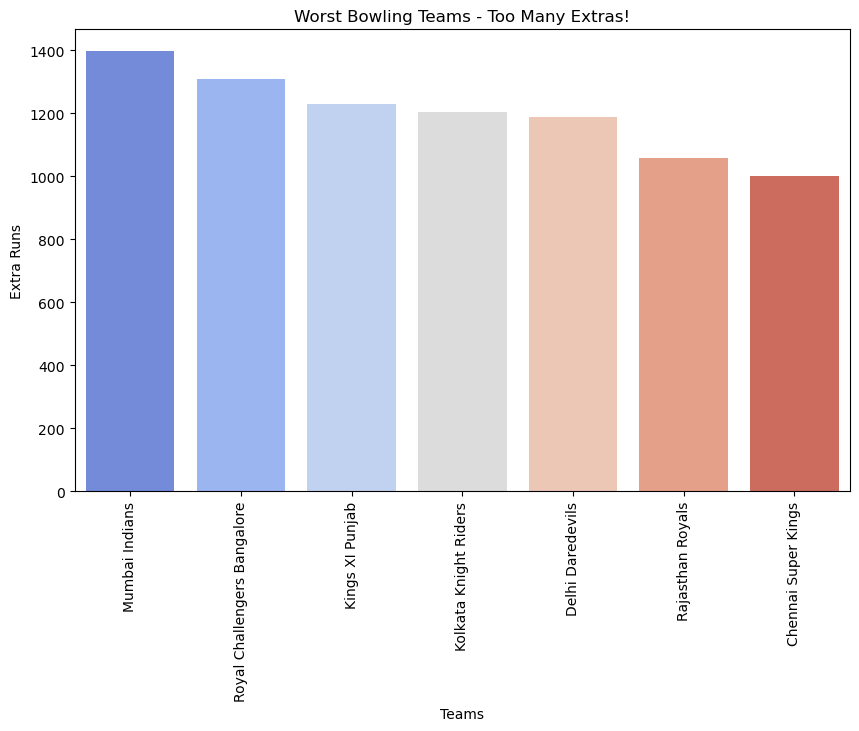

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=bowling_team_extras["bowling_team"], y=bowling_team_extras["extra_runs"], palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Extra Runs")
plt.title("Worst Bowling Teams - Too Many Extras!")
plt.show()

In [9]:
csk_deliveries = deliveries[deliveries["batting_team"] == "Chennai Super Kings"].copy()
csk_deliveries["cum_run"] = csk_deliveries.groupby("match_id")["total_runs"].cumsum()
csk_deliveries["cum_ball"] = csk_deliveries.groupby("match_id").cumcount() + 1

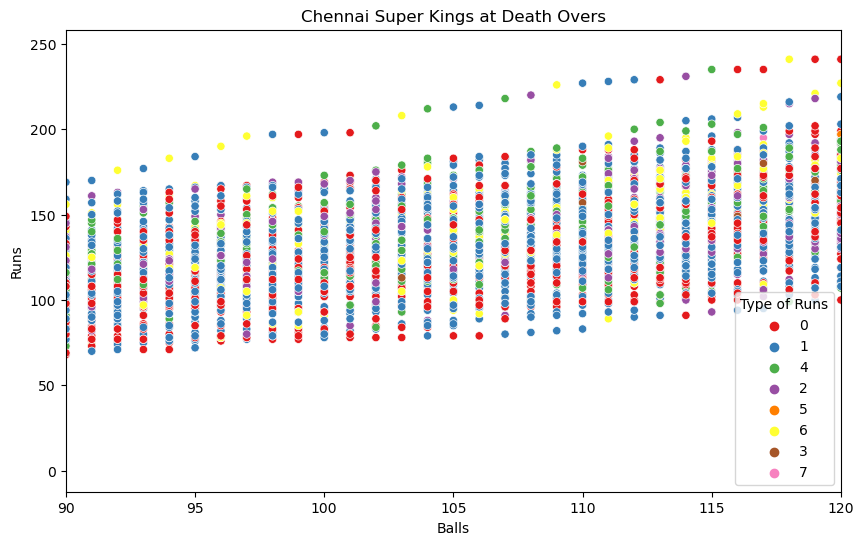

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=csk_deliveries["cum_ball"], y=csk_deliveries["cum_run"], hue=csk_deliveries["total_runs"].astype(str), palette="Set1")
plt.xlim(90, 120)
plt.xlabel("Balls")
plt.ylabel("Runs")
plt.title("Chennai Super Kings at Death Overs")
plt.legend(title="Type of Runs")
plt.show()

In [11]:
mi_deliveries = deliveries[deliveries["batting_team"] == "Mumbai Indians"].copy()
mi_deliveries["cum_run"] = mi_deliveries.groupby("match_id")["total_runs"].cumsum()
mi_deliveries["cum_ball"] = mi_deliveries.groupby("match_id").cumcount() + 1

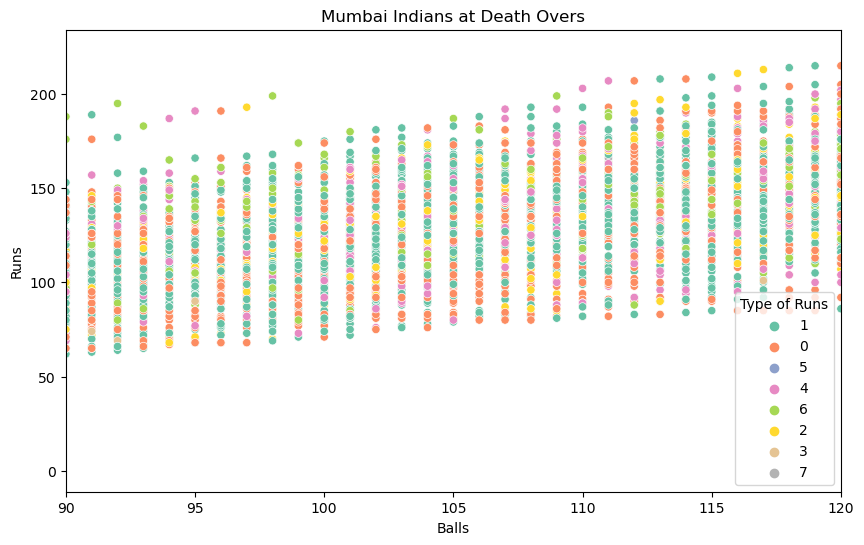

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mi_deliveries["cum_ball"], y=mi_deliveries["cum_run"], hue=mi_deliveries["total_runs"].astype(str), palette="Set2")
plt.xlim(90, 120)
plt.xlabel("Balls")
plt.ylabel("Runs")
plt.title("Mumbai Indians at Death Overs")
plt.legend(title="Type of Runs")
plt.show()


In [14]:
bowling_team_extras = deliveries.groupby("bowling_team")["extra_runs"].sum().reset_index()
bowling_team_extras = bowling_team_extras[bowling_team_extras["extra_runs"] > 1000]
bowling_team_extras = bowling_team_extras.sort_values(by="extra_runs", ascending=False)


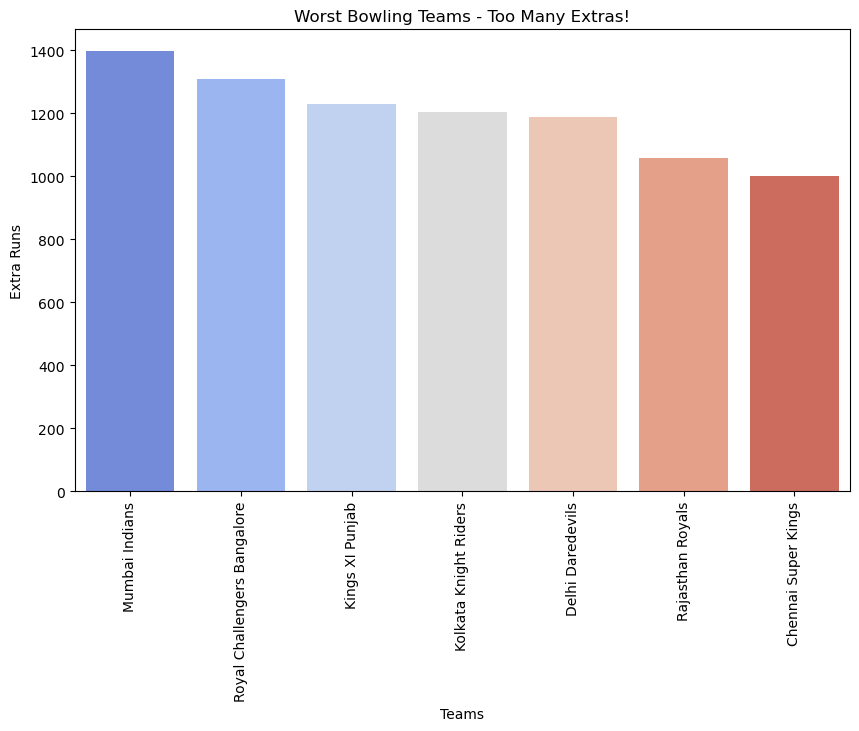

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=bowling_team_extras["bowling_team"], y=bowling_team_extras["extra_runs"], palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Extra Runs")
plt.title("Worst Bowling Teams - Too Many Extras!")
plt.show()

In [16]:
def plot_death_overs(team_name, color_palette):
    team_deliveries = deliveries[deliveries["batting_team"] == team_name].copy()
    team_deliveries["cum_run"] = team_deliveries.groupby("match_id")["total_runs"].cumsum()
    team_deliveries["cum_ball"] = team_deliveries.groupby("match_id").cumcount() + 1
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=team_deliveries["cum_ball"], y=team_deliveries["cum_run"], hue=team_deliveries["total_runs"].astype(str), palette=color_palette)
    plt.xlim(90, 120)
    plt.xlabel("Balls")
    plt.ylabel("Runs")
    plt.title(f"{team_name} at Death Overs")
    plt.legend(title="Type of Runs")
    plt.show()


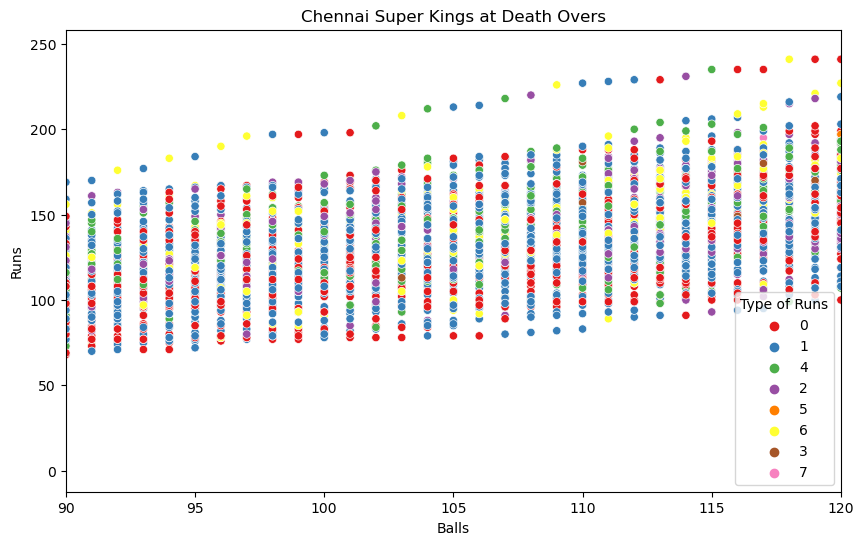

In [17]:
plot_death_overs("Chennai Super Kings", "Set1")

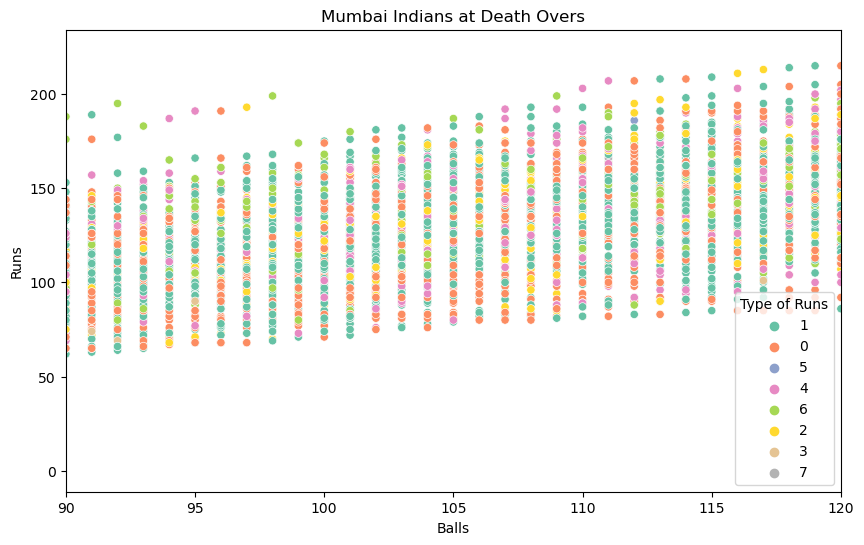

In [18]:
plot_death_overs("Mumbai Indians", "Set2")

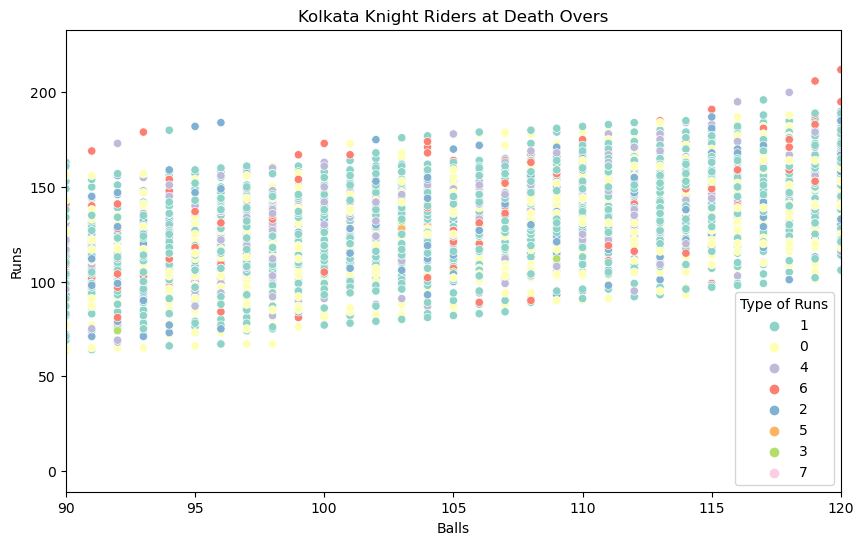

In [19]:
plot_death_overs("Kolkata Knight Riders", "Set3")

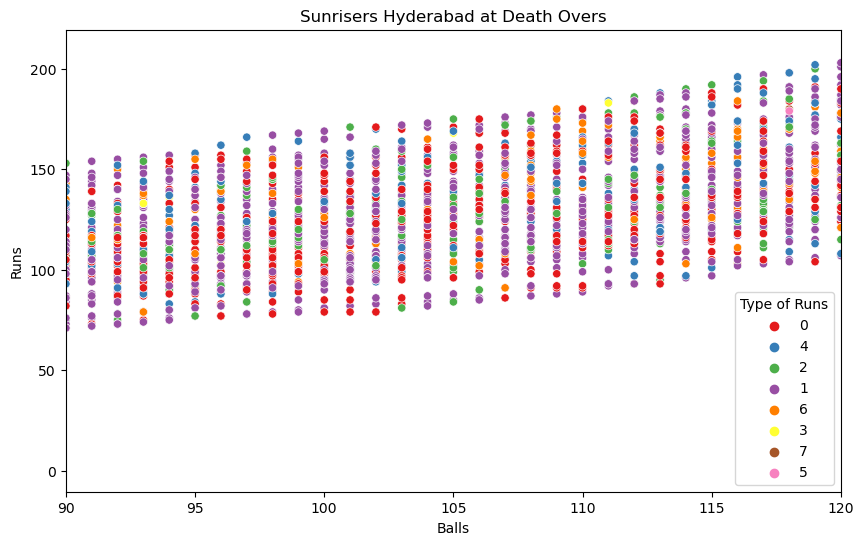

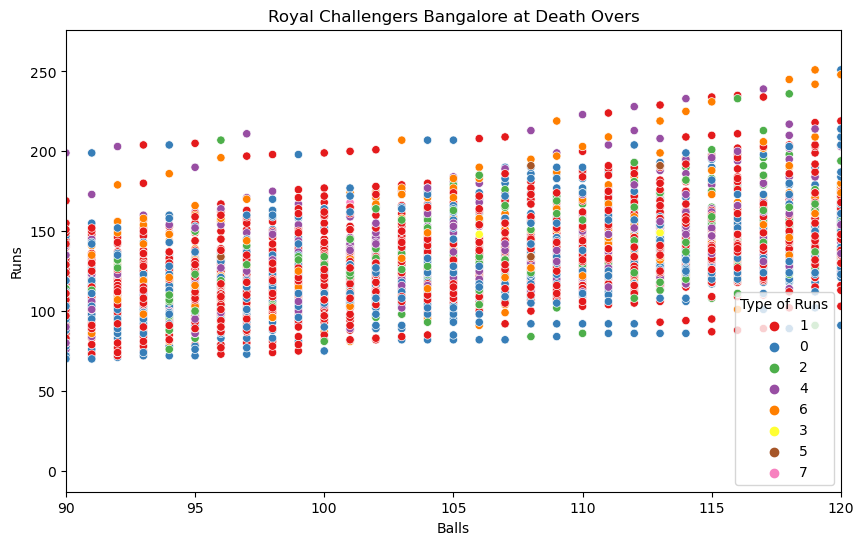

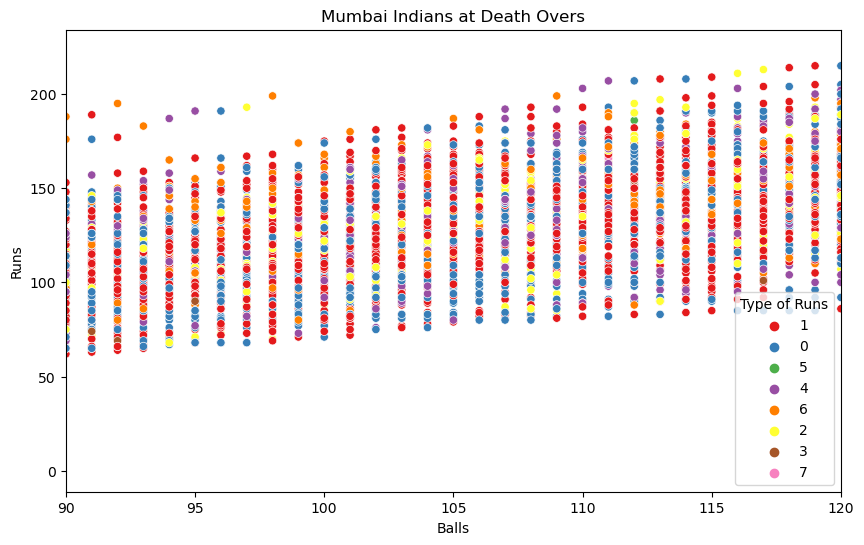

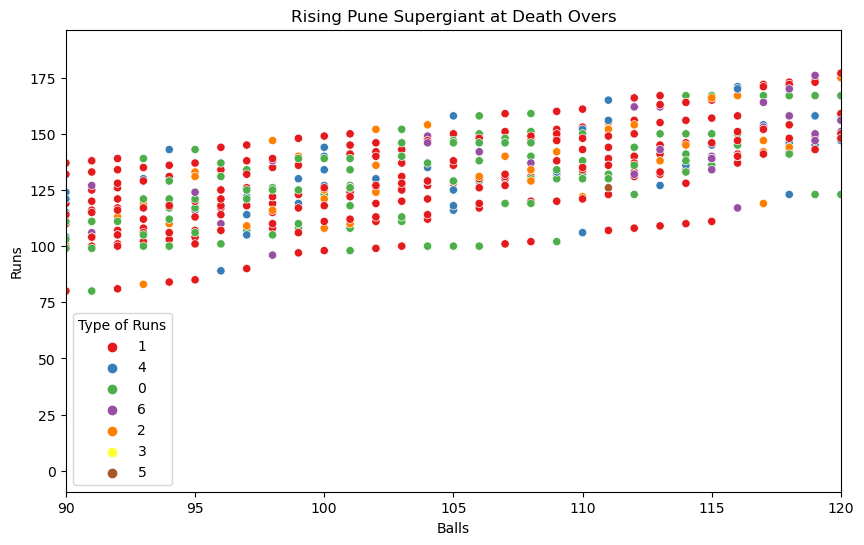

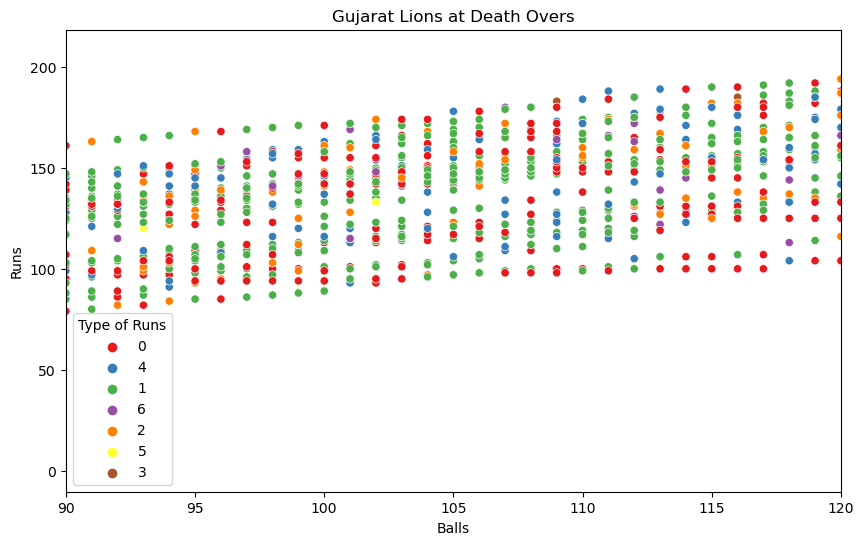

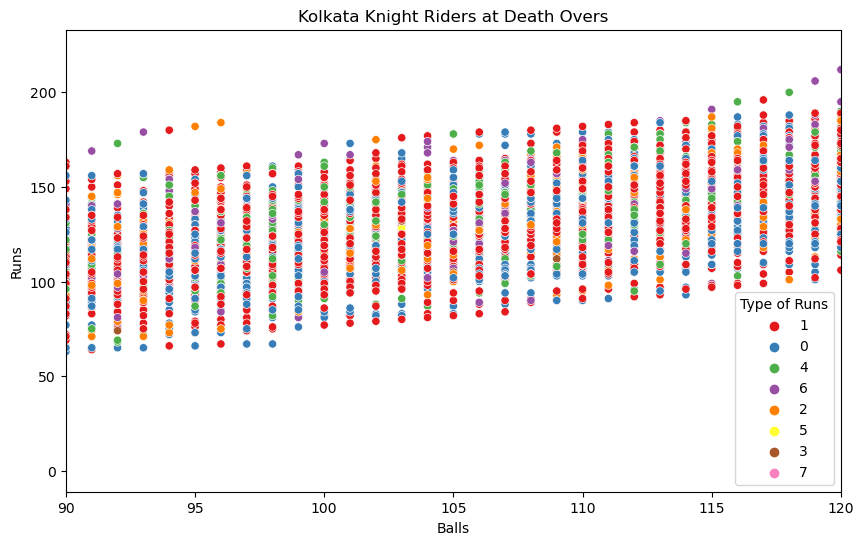

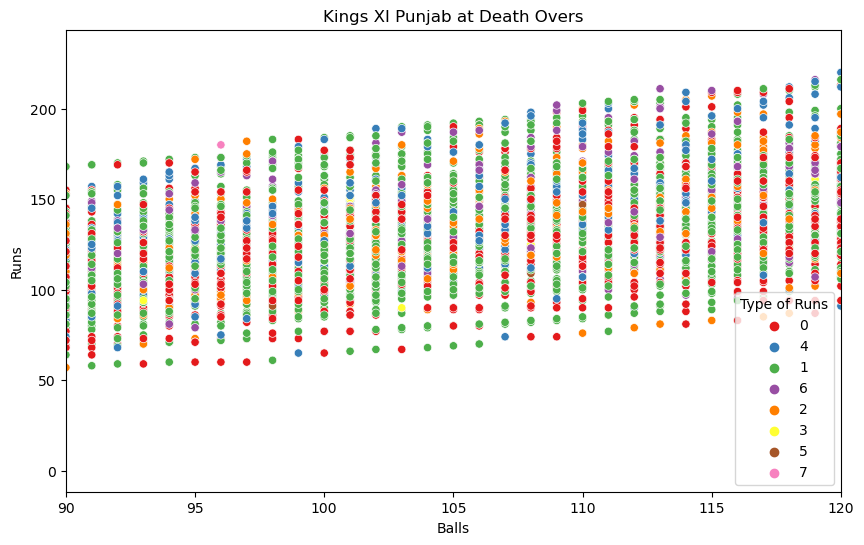

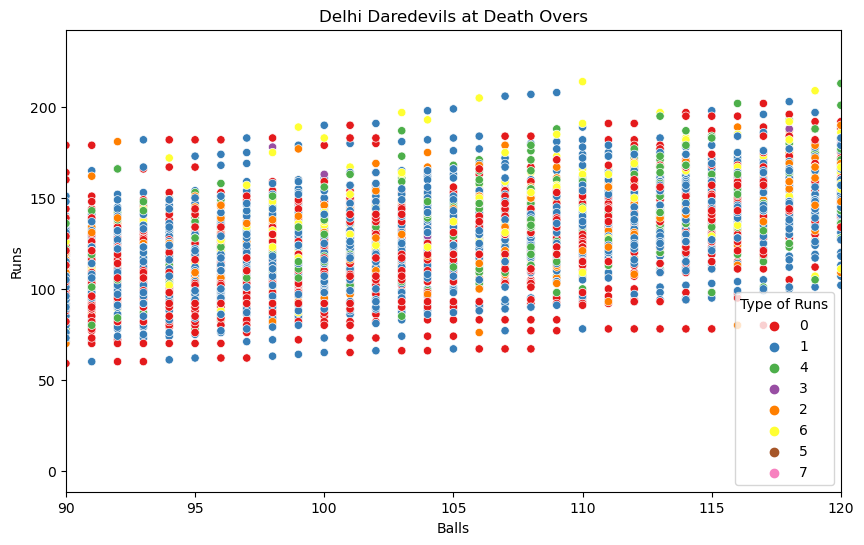

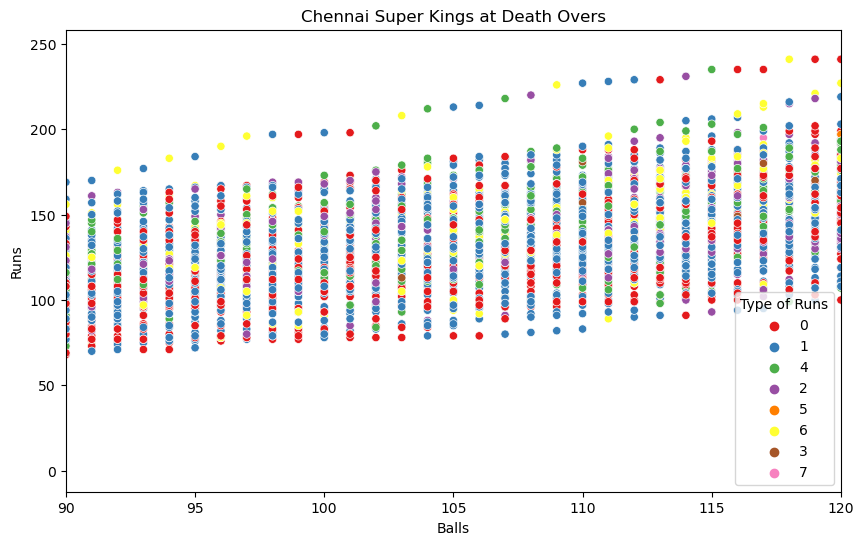

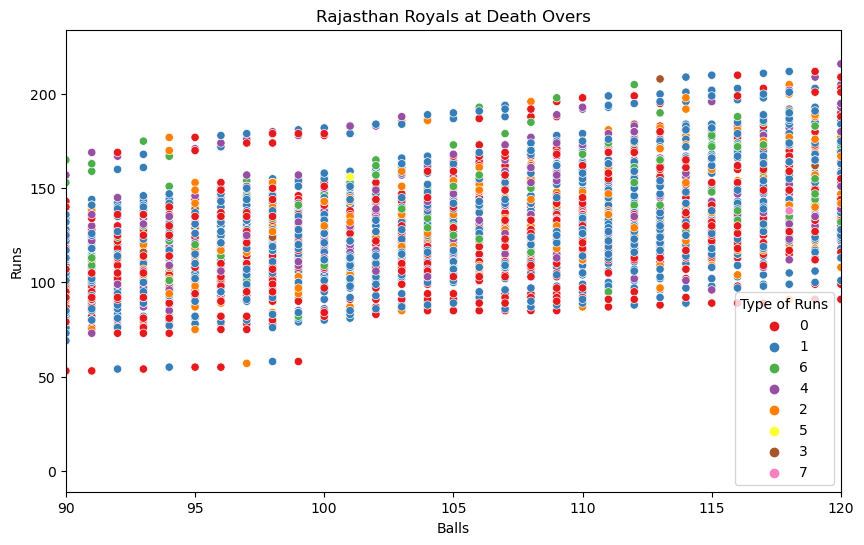

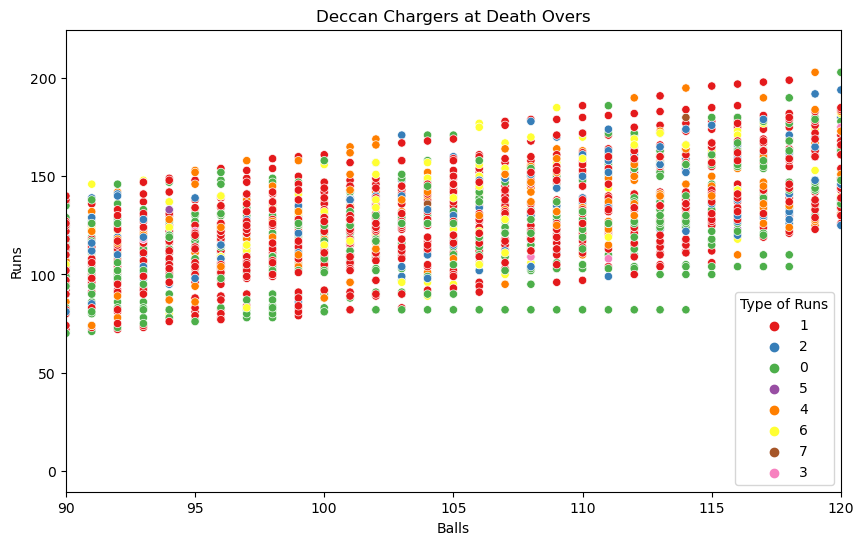

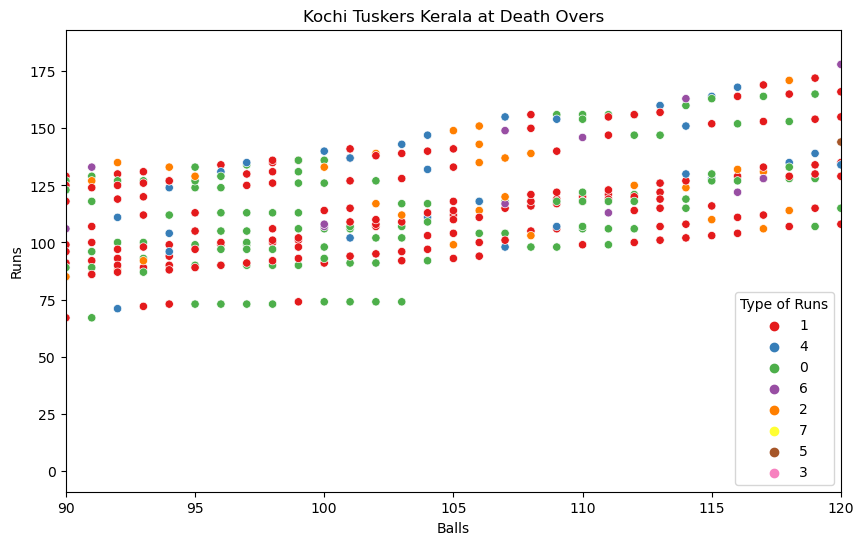

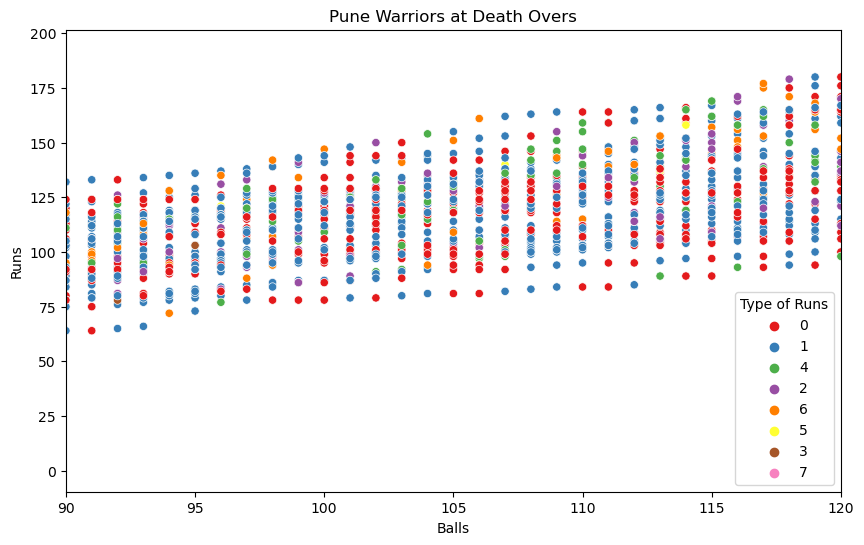

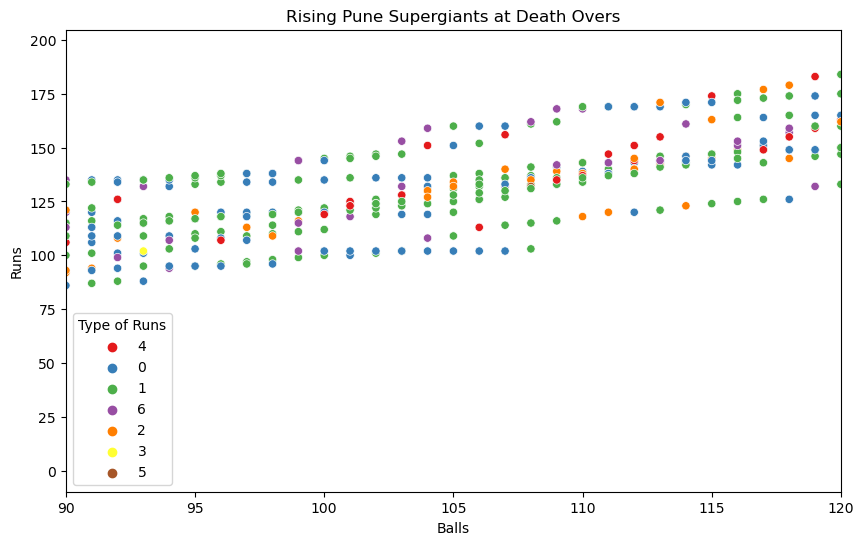

In [20]:
# Function to plot death-over performance for any team
def plot_death_overs(team_name):
    team_deliveries = deliveries[deliveries["batting_team"] == team_name].copy()
    team_deliveries["cum_run"] = team_deliveries.groupby("match_id")["total_runs"].cumsum()
    team_deliveries["cum_ball"] = team_deliveries.groupby("match_id").cumcount() + 1

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=team_deliveries["cum_ball"], y=team_deliveries["cum_run"], 
                    hue=team_deliveries["total_runs"].astype(str), palette="Set1")
    plt.xlim(90, 120)
    plt.xlabel("Balls")
    plt.ylabel("Runs")
    plt.title(f"{team_name} at Death Overs")
    plt.legend(title="Type of Runs")
    plt.show()

# Generate plots for all teams
teams = deliveries["batting_team"].unique()
for team in teams:
    plot_death_overs(team)
